## Importing Important Items

Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [47]:
movies = pd.read_csv("datasets/TMDB_movie_dataset_v11.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261781 entries, 0 to 1261780
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1261781 non-null  int64  
 1   title                 1261768 non-null  object 
 2   vote_average          1261781 non-null  float64
 3   vote_count            1261781 non-null  int64  
 4   status                1261781 non-null  object 
 5   release_date          1019565 non-null  object 
 6   revenue               1261781 non-null  int64  
 7   runtime               1261781 non-null  int64  
 8   adult                 1261781 non-null  bool   
 9   backdrop_path         325569 non-null   object 
 10  budget                1261781 non-null  int64  
 11  homepage              131719 non-null   object 
 12  imdb_id               632145 non-null   object 
 13  original_language     1261781 non-null  object 
 14  original_title        1261768 non-

In [66]:
cols = ['id','title','release_date','overview','genres','original_language','keywords','status', 'adult','poster_path']
movies[cols].head()

,id,title,release_date,overview,genres,original_language,keywords,status,adult,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",en,"rescue, mission, dream, airplane, paris, franc...",Released,False,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",en,"rescue, future, spacecraft, race against time,...",Released,False,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",en,"joker, sadism, chaos, secret identity, crime f...",Released,False,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",en,"future, society, culture clash, space travel, ...",Released,False,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",en,"new york city, superhero, shield, based on com...",Released,False,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [67]:
movies[cols].isnull().sum()

id                        0
title                    13
release_date         242216
overview             273504
genres               530429
original_language         0
keywords             934865
status                    0
adult                     0
poster_path          421968
dtype: int64

## Data Cleaning

In [68]:
df = movies[cols]
df.head()

,id,title,release_date,overview,genres,original_language,keywords,status,adult,poster_path
0,27205,Inception,2010-07-15,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure",en,"rescue, mission, dream, airplane, paris, franc...",Released,False,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,2014-11-05,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction",en,"rescue, future, spacecraft, race against time,...",Released,False,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,2008-07-16,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller",en,"joker, sadism, chaos, secret identity, crime f...",Released,False,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction",en,"future, society, culture clash, space travel, ...",Released,False,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,2012-04-25,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",en,"new york city, superhero, shield, based on com...",Released,False,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


### Dropping NA values

In [77]:
na_drop = ['release_date','overview','genres','original_language','poster_path']

In [78]:
df = df.dropna(subset=na_drop)
print(df.isna().sum())

print('/n')
print(df['id'].duplicated().sum())

id                        0
title                     1
release_date              0
overview                  0
genres                    0
original_language         0
keywords             263166
status                    0
adult                     0
poster_path               0
dtype: int64
/n
46


In [79]:
df = df.fillna('')
print(df.isna().sum())

id                   0
title                0
release_date         0
overview             0
genres               0
original_language    0
keywords             0
status               0
adult                0
poster_path          0
dtype: int64


### Dropping Duplicate movies

In [80]:
duplicate_ids = df[df['id'].duplicated(keep=False)]
duplicate_ids.head(6)

,id,title,release_date,overview,genres,original_language,keywords,status,adult,poster_path
265571,1236071,Semetua,2018-02-07,"Semetua was Sem Manutahi, master of ceremonies...",Documentary,fr,,Released,False,/yulre2ndAtvrLJ09u1R4wSKLtep.jpg
265603,1236071,Semetua,2018-02-07,"Semetua was Sem Manutahi, master of ceremonies...",Documentary,fr,,Released,False,/yulre2ndAtvrLJ09u1R4wSKLtep.jpg
286679,1199990,The Undead,2023-10-27,At the end of times a dysfunctional family tak...,"Horror, Thriller",en,"undead, religion, dead children, religious horror",Released,False,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg
286904,1199990,The Undead,2023-10-27,At the end of times a dysfunctional family tak...,"Horror, Thriller",en,"undead, religion, dead children, religious horror",Released,False,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg
291969,1192952,Rowntree vs Cadbury: A Rivalry Through Time,2023-10-13,Eggwork Media's latest historical documentary ...,"Documentary, History",en,,Released,False,/mlyvQFjHH8HxcbmwRZcIt8Zltbn.jpg
291977,1192952,Rowntree vs Cadbury: A Rivalry Through Time,2023-10-13,Eggwork Media's latest historical documentary ...,"Documentary, History",en,,Released,False,/mlyvQFjHH8HxcbmwRZcIt8Zltbn.jpg


In [81]:
# Drop Duplicate Id 
df.drop_duplicates(subset=['id'], inplace=True)
df.reset_index(drop=True, inplace=True)

#Check for anymore duplicates
print(df.duplicated().sum())

0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461108 entries, 0 to 461107
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 461108 non-null  int64 
 1   title              461108 non-null  object
 2   release_date       461108 non-null  object
 3   overview           461108 non-null  object
 4   genres             461108 non-null  object
 5   original_language  461108 non-null  object
 6   keywords           461108 non-null  object
 7   status             461108 non-null  object
 8   adult              461108 non-null  bool  
 9   poster_path        461108 non-null  object
dtypes: bool(1), int64(1), object(8)
memory usage: 32.1+ MB


## Data Validation

### Subsetting out Adult movies

In [83]:
df['adult'].sum()

np.int64(10708)

In [84]:
df = df[df['adult'] == False]
df['adult'].sum()

np.int64(0)

### Subsetting for Released Movies
I would like to limit the recommendations to released movies only

In [87]:
print('Avaliable Released Values:')
df['status'].value_counts()

Avaliable Released Values:


status
Released           445607
In Production        2861
Post Production      1415
Planned               505
Rumored                 7
Canceled                5
Name: count, dtype: int64

In [89]:
# Subset for only relased movies
df_released = df[df['status'] == 'Released']

print('Avaliable Released Values:')
df_released['status'].value_counts()

Avaliable Released Values:


status
Released    445607
Name: count, dtype: int64

### Date Validation
We don't movies that are too old, to stay relevant we will do some 'chopping'

In [90]:
# Converting the column to the datetime format
df_released['release_date'] = pd.to_datetime(df_released['release_date'])

# Extracting the year to create another column
df_released['release_year'] = df_released['release_date'].dt.year

In [91]:
# Get 5 earliest movies (lowest years)
earliest_5 = df_released.nsmallest(5, 'release_year')[['title', 'release_year', 'release_date']]

# Get 5 most recent movies (highest years)
recent_5 = df_released.nlargest(5, 'release_year')[['title', 'release_year', 'release_date']]

print("5 Earliest Movies:")
print(earliest_5)
print("\n5 Most Recent Movies:")
print(recent_5)

5 Earliest Movies:
                                    title  release_year release_date
188375  Felix Nadar Spinning in his Chair          1865   1865-01-01
19161                    Passage of Venus          1874   1874-12-09
254438                ივანიკა და სიმონიკა          1875   1875-06-09
47028                 The Musician Monkey          1878   1878-05-07
54272                   The Magic Rosette          1878   1878-05-07

5 Most Recent Movies:
                                 title  release_year release_date
312398     Athens dances Rock 'n' Roll          2057   2057-01-01
278855  The Cold Awake: The Last Pulse          2027   2027-08-06
258552      On The Edge: Donnie Dares!          2026   2026-12-31
282107   National Theatre Live: Hamlet          2026   2026-01-22
283232           Pickle For Pickleball          2026   2026-08-28


Decade distribution:


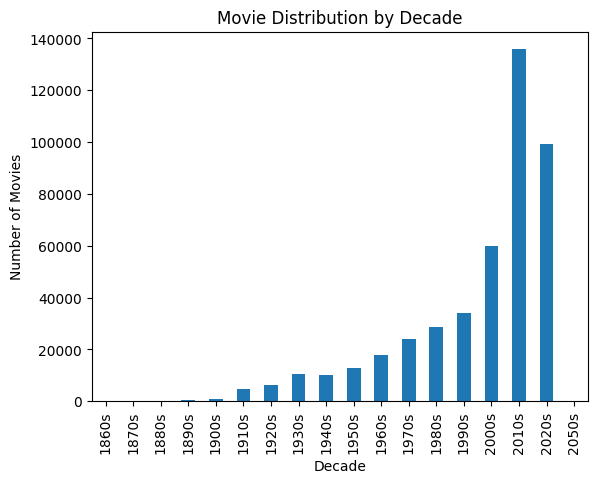

In [92]:
# Create decade column
df_released['decade'] = (df_released['release_year'] // 10) * 10
df_released['decade_label'] = df_released['decade'].astype(str) + 's'

# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [93]:
# Subset the data to only include movies released between 1990 and 2025
df_released = df_released[(df_released['release_year'] >= 1990) & (df_released['release_year'] <= 2025)]
df_released.sort_values(by='release_year', ascending=False).head()

,id,title,release_date,overview,genres,original_language,keywords,status,adult,poster_path,release_year,decade,decade_label
245762,1493844,Sudah Jatuh Tertimpa Mangga,2025-05-26,"Eko, Dwi, and Tri are three friends who wants ...","Comedy, Drama, Family",en,"sudah jatuh tertimpa mangga, peribahasa, sahabat",Released,False,/rFqYIAcT548dbvg0jJUliGtB0x7.jpg,2025,2020,2020s
245728,1499675,Claustrophobia,2025-06-05,A young man attempts to complete a drawing as ...,Horror,en,"paranoia, drawing, monochrome, claustrophobic,...",Released,False,/sgQf3O5xMc2XKaUCDnCvEisrgT8.jpg,2025,2020,2020s
245725,1498011,Where`s My Body Armor?,2025-06-10,"Dasha, a young cinematographer, is going home ...",Documentary,uk,,Released,False,/rmDWWNOlmn4HPNW4bmL59f37lmr.jpg,2025,2020,2020s
245719,1497693,John Levene In Conversation,2025-03-03,In Conversation was a series of Doctor Who Blu...,Documentary,en,,Released,False,/hO9Zof53v9pXVrBtaNxww88xFoL.jpg,2025,2020,2020s
245800,1497682,Sam Licor 2,2025-06-10,Sam Licor and Jebediah are living peacefully i...,"Action, Comedy, Science Fiction",en,,Released,False,/rHVNOOq6HBfBzBo6Y9kfFfDX6vx.jpg,2025,2020,2020s


Decade distribution:


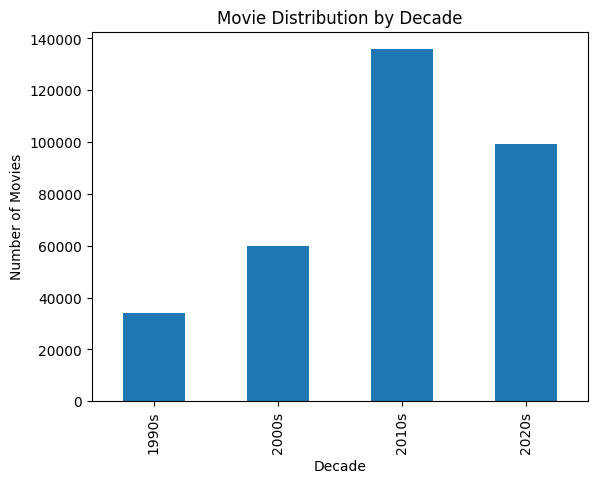

In [95]:
# Show distribution
print("Decade distribution:")
decade_counts = df_released['decade_label'].value_counts().sort_index()
decade_counts.plot(kind='bar', xlabel='Decade', ylabel='Number of Movies', title='Movie Distribution by Decade')
plt.show()

In [94]:
df_released.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329176 entries, 0 to 461107
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 329176 non-null  int64         
 1   title              329176 non-null  object        
 2   release_date       329176 non-null  datetime64[ns]
 3   overview           329176 non-null  object        
 4   genres             329176 non-null  object        
 5   original_language  329176 non-null  object        
 6   keywords           329176 non-null  object        
 7   status             329176 non-null  object        
 8   adult              329176 non-null  bool          
 9   poster_path        329176 non-null  object        
 10  release_year       329176 non-null  int32         
 11  decade             329176 non-null  int32         
 12  decade_label       329176 non-null  object        
dtypes: bool(1), datetime64[ns](1), int32(2), int64(1)

### Subsetting for English Movies

In [96]:
# Check what status values exist
print("Available Languages:")
print(df_released['original_language'].value_counts())

Available Languages:
original_language
en    179311
ja     16694
es     16125
fr     16092
de      9059
       ...  
gv         1
ts         1
co         1
kg         1
ch         1
Name: count, Length: 165, dtype: int64


In [98]:
# Then filter
df_released = df_released[df_released['original_language'] == 'en'].reset_index(drop=True)

# Check after filtering
print("Available AFter filtering")
df_released[['original_language']].value_counts()

Available AFter filtering


original_language
en                   179311
Name: count, dtype: int64

### Column Extraction


In [99]:
# Create df2
df2 = df_released[['id', 'title', 'overview', 'genres', 'keywords', 'decade_label', 'release_year', 'poster_path']].copy()

In [100]:
df2.head()

,id,title,overview,genres,keywords,decade_label,release_year,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2010s,2010,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2010s,2014,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2000s,2008,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",2000s,2009,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",2010s,2012,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


## Preprocessing Steps

### Stemming "Overview" Column

In [101]:
from nltk.stem.porter import PorterStemmer
import re

# Initialize stemmer
ps = PorterStemmer()

def clean_and_stem_overview(text):
    """
    Clean and stem the overview text
    """
    # Remove years (optional - you can keep if you want temporal context)
    text = re.sub(r'\b(19[0-9]{2}|20[0-9]{2})\b', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation (optional)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Split into words and stem each word
    words = text.split()
    stemmed_words = [ps.stem(word) for word in words]
    
    # Join back into a single string
    return ' '.join(stemmed_words)

In [102]:
# Apply to overview column
df2['overview_stemmed'] = df2['overview'].apply(clean_and_stem_overview)

# Preview the new column
df2['overview_stemmed'].head()

0    cobb a skill thief who commit corpor espionag ...
1    the adventur of a group of explor who make use...
2    batman rais the stake in hi war on crime with ...
3    in the 22nd centuri a parapleg marin is dispat...
4    when an unexpect enemi emerg and threaten glob...
Name: overview_stemmed, dtype: object

### Preprocessig for other text columns

In [103]:
def clean_text(text):
    """
    Convert text to lowercase and strip whitespace
    """
    if pd.isna(text):
        return ""
    
    return str(text).lower().strip()

In [104]:
# Define text columns to clean
text_columns = ['genres', 'keywords']

# Apply cleaning function to all text columns
for col in text_columns:
    df2[col] = df2[col].apply(clean_text)

# Preview cleaned data
print(df2[text_columns].head())

                                        genres  \
0           action, science fiction, adventure   
1            adventure, drama, science fiction   
2               drama, action, crime, thriller   
3  action, adventure, fantasy, science fiction   
4           science fiction, action, adventure   

                                            keywords  
0  rescue, mission, dream, airplane, paris, franc...  
1  rescue, future, spacecraft, race against time,...  
2  joker, sadism, chaos, secret identity, crime f...  
3  future, society, culture clash, space travel, ...  
4  new york city, superhero, shield, based on com...  


### Creating the Soup

In [105]:
df2['soup'] = df2['genres'] + ' ' + df2['keywords'] + ' ' + df2['overview_stemmed'] + ' ' + df2['decade_label']
df2['soup'].head()

0    action, science fiction, adventure rescue, mis...
1    adventure, drama, science fiction rescue, futu...
2    drama, action, crime, thriller joker, sadism, ...
3    action, adventure, fantasy, science fiction fu...
4    science fiction, action, adventure new york ci...
Name: soup, dtype: object

In [106]:
df2['soup'].iloc[0]

'action, science fiction, adventure rescue, mission, dream, airplane, paris, france, virtual reality, kidnapping, philosophy, spy, allegory, manipulation, car crash, heist, memory, architecture, los angeles, california, dream world, subconscious cobb a skill thief who commit corpor espionag by infiltr the subconsci of hi target is offer a chanc to regain hi old life as payment for a task consid to be imposs incept the implant of anoth person idea into a target subconsci 2010s'

## Modelling

### Vectorization Steps

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    min_df=10,      
    max_df=0.8,       # drop terms in ≥75% of the movies
    max_features=15000,             # Keep top 15,000 features
    ngram_range=(1, 2),            # Use unigrams and bigrams
)

X_tfidf = tfidf.fit_transform(df2['soup'].fillna(''))

In [108]:
X_tfidf.shape

(179311, 15000)

In [109]:
print(tfidf.get_feature_names_out()[:300])  # See what words are being used

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '10 year' '100'
 '100 year' '1000' '10000' '100000' '100th' '10th' '10th anniversari'
 '10yearold' '11' '11 year' '11th' '11yearold' '12' '12 year' '120' '12th'
 '12yearold' '13' '13 year' '13th' '13yearold' '14' '14 year' '14th'
 '14yearold' '15' '15 year' '150' '150 year' '1500' '15th' '15yearold'
 '16' '16 year' '16mm' '16mm film' '16th' '16yearold' '17' '17 year'
 '17th' '17yearold' '18' '18 year' '1800' '18th' '18th centuri'
 '18yearold' '19' '1920' '1920s' '1930' '1930s' '1940' '1940s' '1950'
 '1950s' '1960' '1960s' '1970' '1970s' '1980' '1980s' '1990' '1990s'
 '19th' '19th centuri' '19th century' '19yearold' '1st' '20' '20 year'
 '200' '200 year' '2000' '20000' '2000s' '2010s' '2020s' '20someth' '20th'
 '20th anniversari' '20th centuri' '20yearold' '21' '21st' '21st centuri'
 '22' '22nd' '23' '23 year' '23rd' '24' '24 hour' '24hour' '24th' '25'
 '25 year' '250' '25th' '25th anniversari' '26' '26th' '27' '27th' '28'
 '28th' '29' 

In [110]:
#Construct a reverse map of indices and movie titles
df2 = df2.reset_index(drop=True)
df2['title_lower'] = df2['title'].str.lower().str.strip()
indices = pd.Series(df2['id'].values, index=df2['title_lower']).drop_duplicates()

In [111]:
indices.head()

title_lower
inception           27205
interstellar       157336
the dark knight       155
avatar              19995
the avengers        24428
dtype: int64

### Model Function Creation

In [112]:
from sklearn.neighbors import NearestNeighbors
import difflib

# 1. Fit the NearestNeighbors model (do this once)
#    We ask for 11 neighbours: movie itself + 10 closest others
nn = NearestNeighbors(
    n_neighbors=11,
    metric='cosine',
    algorithm='brute',
    n_jobs=-1
)
nn.fit(X_tfidf)   # X_tfidf is your TF–IDF sparse matrix

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=11)

In [113]:
def get_recommendations(movie_title, nn_model=nn, tfidf_matrix=X_tfidf, df=df2, indices=indices, min_similarity=0.6):
    """
    Get 10 movie recommendations based on a movie title.
    
    Parameters:
    - movie_title: String, the title of the movie to find recommendations for
    - nn_model: Fitted NearestNeighbors model
    - tfidf_matrix: TF-IDF matrix used for training
    - df: DataFrame containing movie data
    - indices: Series mapping movie titles to IDs
    - min_similarity: Minimum similarity threshold for auto-correction
    
    Returns:
    - List of 10 recommended movie titles
    """
    # Normalize the input title
    key = movie_title.lower().strip()
    
    # Check if the title exists in our index
    if key not in indices.index:
        # Try to auto-correct using difflib
        close_matches = difflib.get_close_matches(key, indices.index, n=1, cutoff=min_similarity)
        
        if close_matches:
            corrected_key = close_matches[0]
            corrected_movie_id = indices[[corrected_key]].iloc[0]
            
            # Get the corrected movie title
            corrected_title = df[df['id'] == corrected_movie_id]['title'].iloc[0]
            print(f"Title '{movie_title}' not found. Using closest match: '{corrected_title}'")
            
            key = corrected_key
        else:
            raise KeyError(f"Movie title '{movie_title}' not found and no close match available.")
    
    # Get the movie ID for the title
    movie_id = indices[[key]].iloc[0]
    
    # Find the row index in the DataFrame
    movie_row = df[df['id'] == movie_id]
    if len(movie_row) == 0:
        raise KeyError(f"Movie with ID {movie_id} not found in DataFrame.")
    
    row_idx = movie_row.index[0]
    
    # Get the TF-IDF vector for this movie
    movie_vector = tfidf_matrix[row_idx]
    
    # Find the 11 nearest neighbors (including the movie itself)
    distances, neighbor_indices = nn_model.kneighbors(movie_vector, return_distance=True)
    
    # Remove the first neighbor (it's the movie itself) and get the next 10
    recommended_indices = neighbor_indices[0][1:11]  # Get indices 1-10
    
    # Get the recommended movie titles
    recommended_movies = df.iloc[recommended_indices]['title'].tolist()
    
    return recommended_movies

In [114]:
# Example usage
get_recommendations("Kill Bill  Vol. 1")

Title 'Kill Bill  Vol. 1' not found. Using closest match: 'Kill Bill: Vol. 1'


['Kill Bill: The Whole Bloody Affair',
 'Into the Sun',
 'Kill Bill: Vol. 2',
 'Crouching Tiger, Hidden Dragon: Sword of Destiny',
 'The Longsword by Johannes Liechtenauer Part I',
 'Crossed',
 'Gladiator Cop',
 'True Vengeance',
 'Lady Samurai',
 'American Dragons']

## Saving Datasets as Pickle Files

In [115]:
df3 = df2[['id', 'title','overview', 'genres', 'release_year', 'title_lower', 'poster_path']]
df3.head()

,id,title,overview,genres,release_year,title_lower,poster_path
0,27205,Inception,"Cobb, a skilled thief who commits corporate es...","action, science fiction, adventure",2010,inception,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg
1,157336,Interstellar,The adventures of a group of explorers who mak...,"adventure, drama, science fiction",2014,interstellar,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg
2,155,The Dark Knight,Batman raises the stakes in his war on crime. ...,"drama, action, crime, thriller",2008,the dark knight,/qJ2tW6WMUDux911r6m7haRef0WH.jpg
3,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","action, adventure, fantasy, science fiction",2009,avatar,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg
4,24428,The Avengers,When an unexpected enemy emerges and threatens...,"science fiction, action, adventure",2012,the avengers,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg


In [116]:
# Save/Update files as pickle files
# The Dataframe
import pickle

with open('Pkled Files/dataframe.pkl', 'wb') as f:
    pickle.dump(df3, f)

In [117]:
# The Indices
with open('Pkled Files/indices.pkl', 'wb') as f:
    pickle.dump(indices, f)

In [118]:
# The Tfidf Matrix
with open('Pkled Files/tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(X_tfidf, f)